In [1]:
import jax.numpy as jnp
from jax import config, random, vmap
config.update("jax_enable_x64", True)

import requests
from urllib.parse import urlencode

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
! git init .
! git remote add origin https://github.com/VLSF/augmentation
! git pull origin main

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
From https://github.com/VLSF/augmentation
 * branch            main       -> FETCH_HEAD
Already up to date.


In [3]:
from augmentation import D2

For $D=2$ it is slightly harder to select reasonable augmentation if second derivatives are involved (this is a deficiency of a current training strategy). The results from the article are obtained with the functions

`elliptic_augmentation_II`

`convection_diffusion_augmentation_II`

`wave_augmentation_II`

# Elliptic alpha

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/Wzb3Ga6hU-ss8g'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('elliptic_alpha_dataset.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/elliptic_alpha_dataset.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((4000, 4, 100, 100), (4000, 1, 100, 100))

In [5]:
key = random.PRNGKey(11)
features_, targets_ = D2.augment_dataset(features[:1000], targets[:1000], key, D2.elliptic_augment_sample, 1, M=3, beta=1)
del features, targets, data
features_.shape, targets_.shape

((2000, 4, 100, 100), (2000, 1, 100, 100))

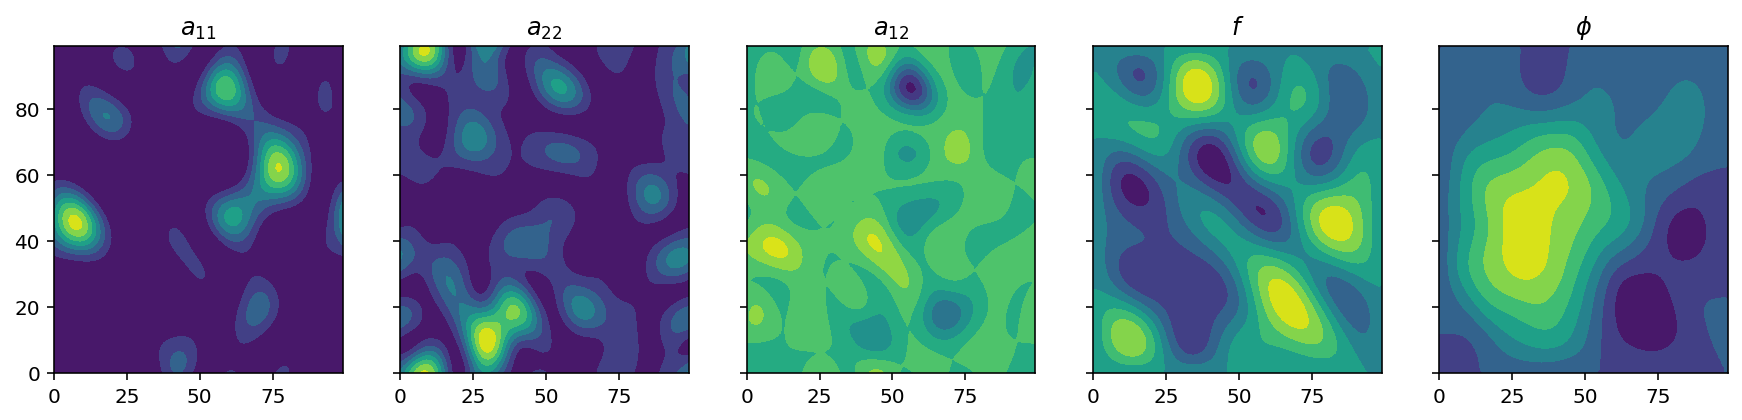

In [6]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$f$", "$\\phi$"]
sample = 0

for i in range(4):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(5):
    ax[i].set_title(titles[i])

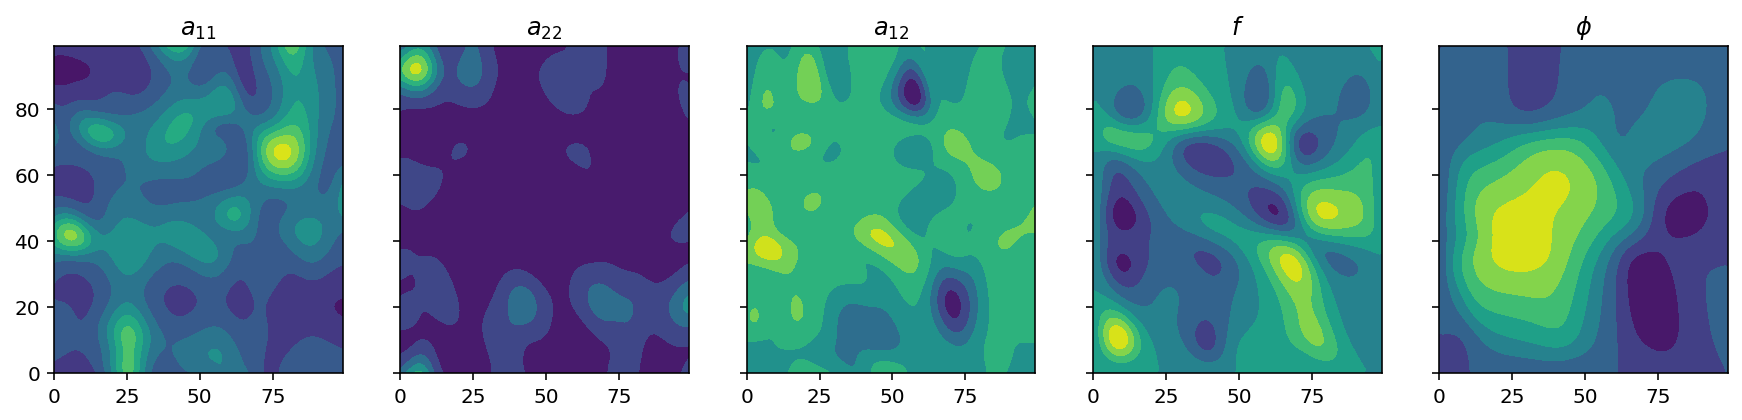

In [7]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$f$", "$\\phi$"]
sample = sample + 1000

for i in range(4):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(5):
    ax[i].set_title(titles[i])

In [8]:
del features_, targets_, features, targets

# Elliptic beta

In [9]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/mvSTWhkyx8Y3kg'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('elliptic_beta_dataset.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/elliptic_beta_dataset.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((4000, 4, 100, 100), (4000, 1, 100, 100))

In [10]:
key = random.PRNGKey(11)
features_, targets_ = D2.augment_dataset(features[:1000], targets[:1000], key, D2.elliptic_augment_sample, 1, M=3, beta=1)
del features, targets, data
features_.shape, targets_.shape

((2000, 4, 100, 100), (2000, 1, 100, 100))

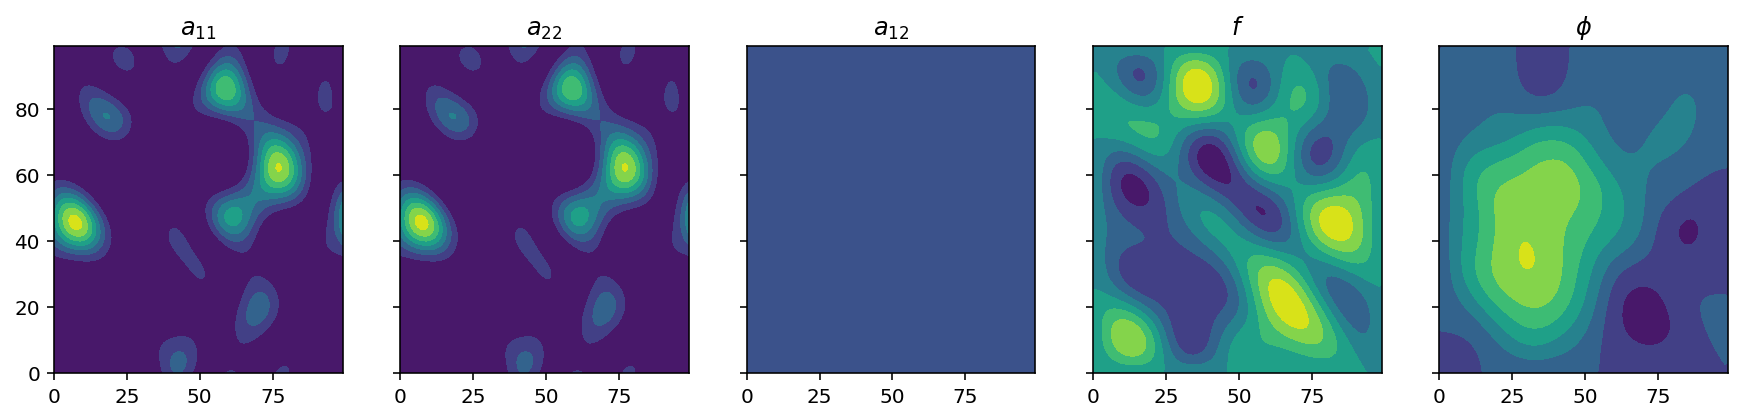

In [11]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$f$", "$\\phi$"]
sample = 0

for i in range(4):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(5):
    ax[i].set_title(titles[i])

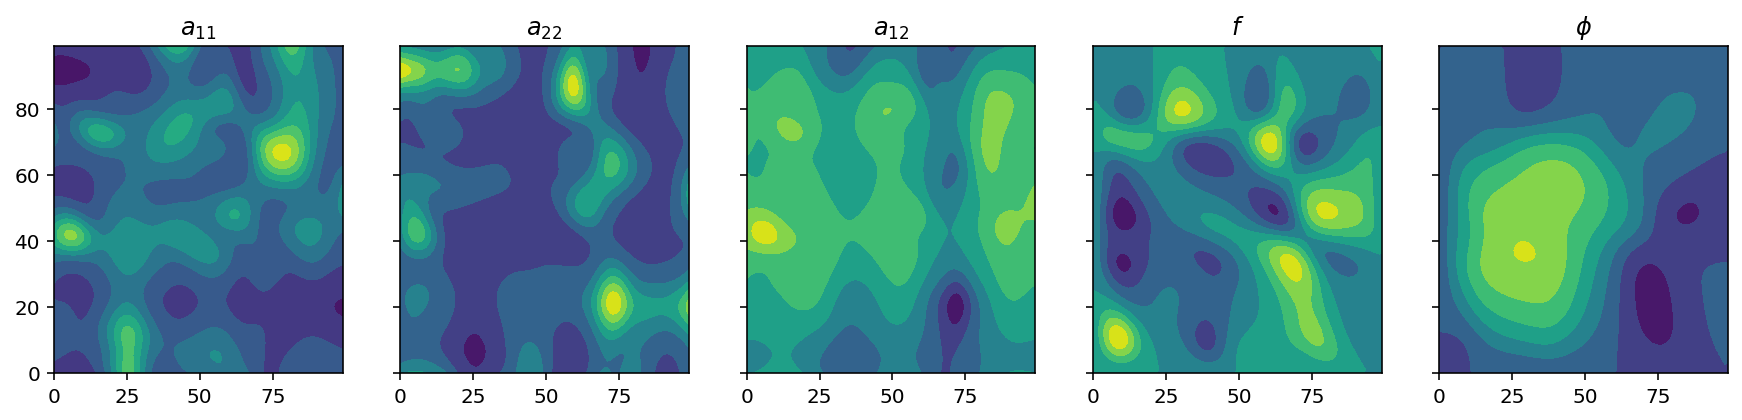

In [12]:
fig, ax = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$f$", "$\\phi$"]
sample = sample + 1000

for i in range(4):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(5):
    ax[i].set_title(titles[i])

# Convection-diffusion

In [13]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/KTGSy-M6dc6Iaw'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('cd_dataset.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/cd_dataset.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((4000, 6, 100, 100), (4000, 1, 100, 100))

In [14]:
key = random.PRNGKey(11)
features_, targets_ = D2.augment_dataset(features[:1000], targets[:1000], key, D2.convection_diffusion_augment_sample, 1, M=3, beta=1)
del features, targets, data
features_.shape, targets_.shape

((2000, 6, 100, 100), (2000, 1, 100, 100))

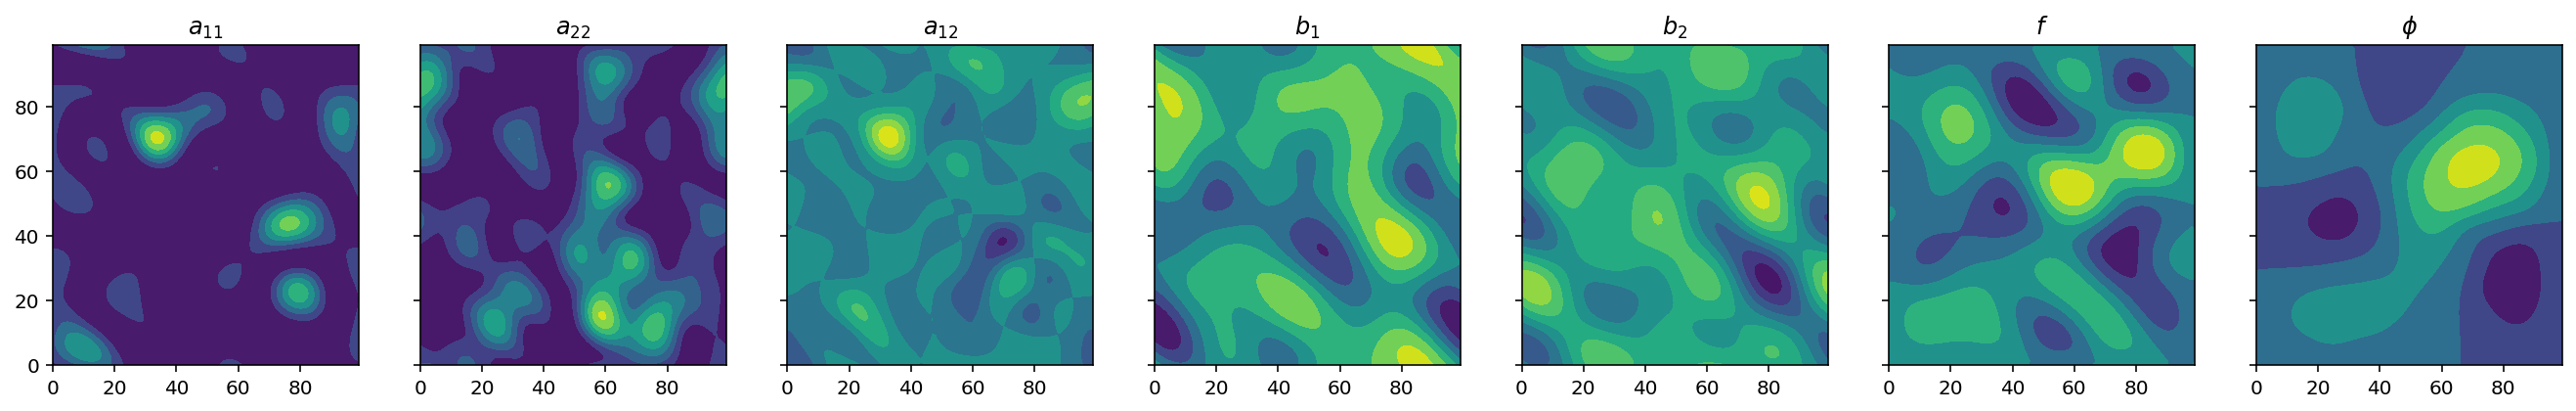

In [15]:
fig, ax = plt.subplots(1, 7, figsize=(23, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$b_1$", "$b_2$", "$f$", "$\\phi$"]

sample = 3
for i in range(6):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(7):
    ax[i].set_title(titles[i])

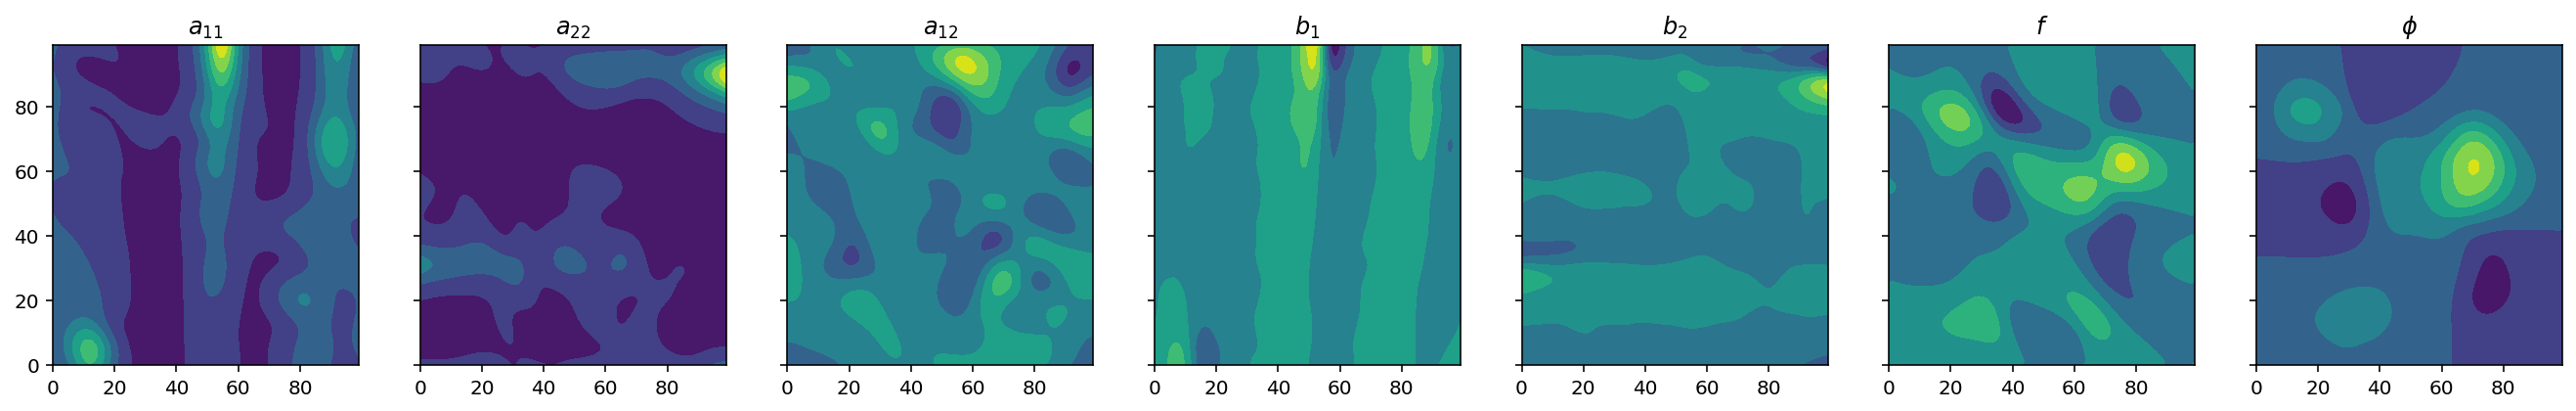

In [16]:
fig, ax = plt.subplots(1, 7, figsize=(23, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$b_1$", "$b_2$", "$f$", "$\\phi$"]

sample = sample + 1000
for i in range(6):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(7):
    ax[i].set_title(titles[i])

# Wave

In [4]:
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/M00m-4N2e3dugw'

final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']

download_response = requests.get(download_url)
with open('wave_dataset.npz', 'wb') as f:
    f.write(download_response.content)

data = jnp.load("/content/wave_dataset.npz")
features = data["features"]
targets = data["targets"]

features.shape, targets.shape

((4000, 6, 100, 100), (4000, 1, 100, 100))

In [5]:
key = random.PRNGKey(11)
features_, targets_ = D2.augment_dataset(features[:1000], targets[:1000], key, D2.wave_augment_sample, 1, M=3, beta=1)
del features, targets, data
features_.shape, targets_.shape

((2000, 6, 100, 100), (2000, 1, 100, 100))

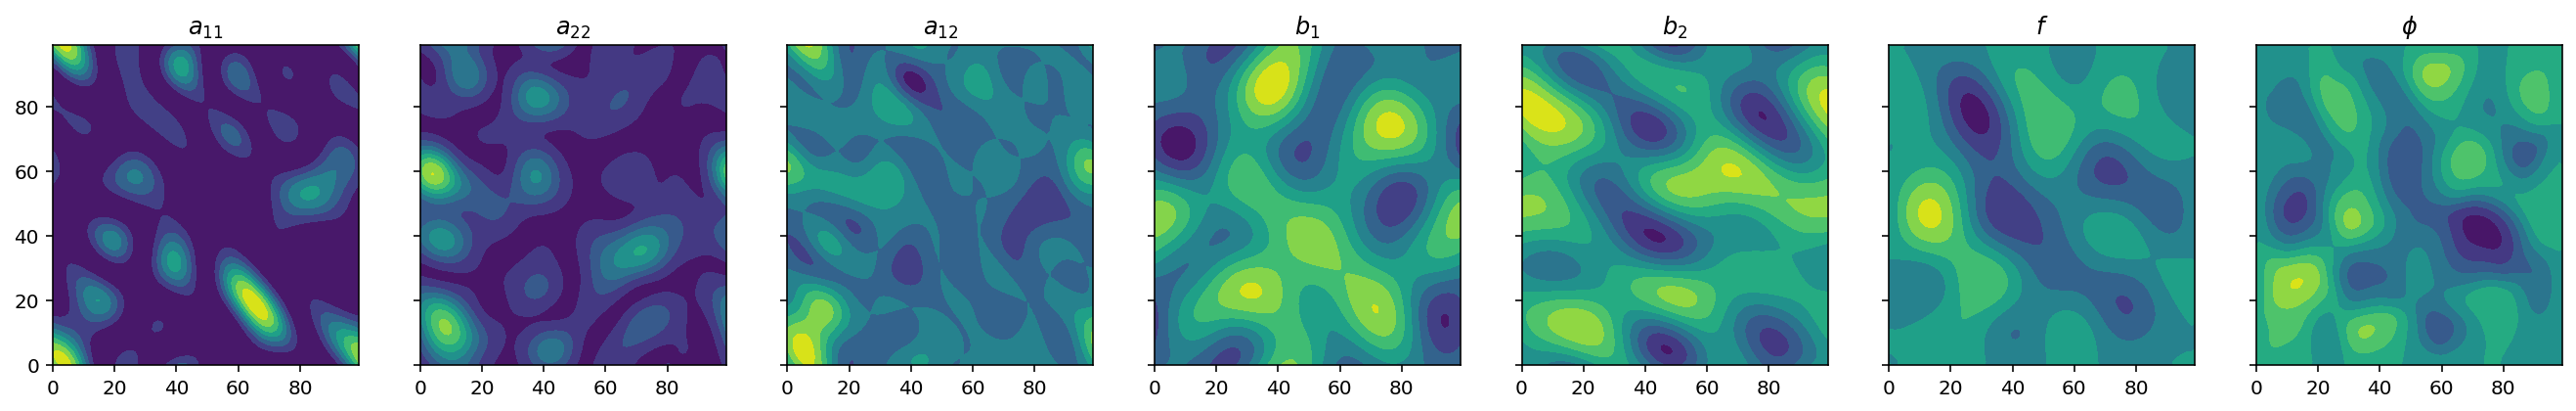

In [6]:
fig, ax = plt.subplots(1, 7, figsize=(23, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$b_1$", "$b_2$", "$f$", "$\\phi$"]
sample = 2

for i in range(6):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(7):
    ax[i].set_title(titles[i])

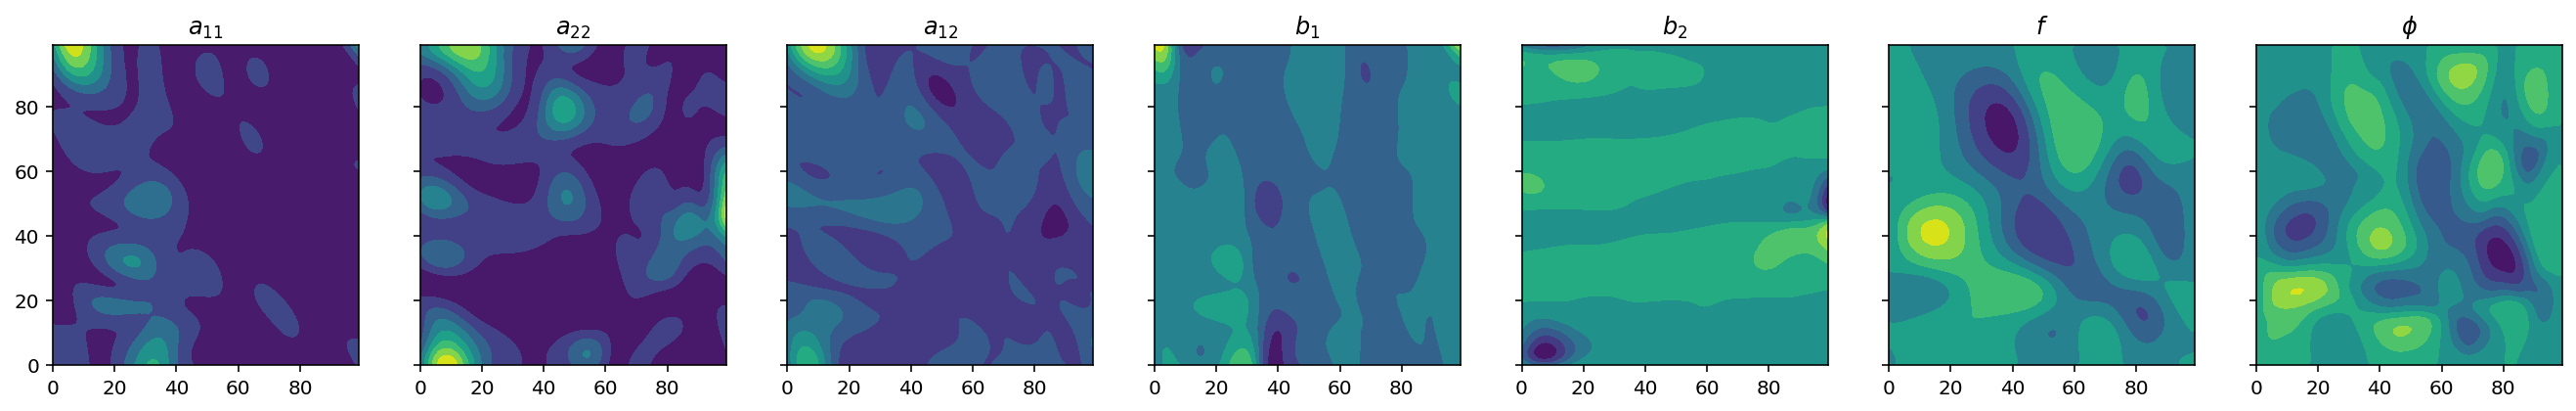

In [7]:
fig, ax = plt.subplots(1, 7, figsize=(23, 3), sharey=True)

titles = ["$a_{11}$", "$a_{22}$", "$a_{12}$", "$b_1$", "$b_2$", "$f$", "$\\phi$"]
sample = sample + 1000

for i in range(6):
    ax[i].contourf(features_[sample, i])

ax[-1].contourf(targets_[sample, 0])

for i in range(7):
    ax[i].set_title(titles[i])